Scrape the Location Counts

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [47]:
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="wpr-table")

states = [th.get_text(strip=True) for th in table.find_all("th")[4:]]

rows = []
for i, tr in enumerate(table.find_all("tr")[1:]):
    cells = tr.find_all("td")
    row_data = {
        "state": states[i],
        "2023": (cells[0].find("a") or cells[0]).get_text(strip=True),
        "2021": (cells[1].find("a") or cells[1]).get_text(strip=True),
        "2024": (cells[2].find("a") or cells[2]).get_text(strip=True)
    }
    rows.append(row_data)

df_star = pd.DataFrame(rows)

df_star_clean = df_star.melt(id_vars=["state"], var_name="year", value_name="store_count")
df_star_clean["location"] = "Starbucks"


In [48]:
df_star_clean

,state,year,store_count,location
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks
...,...,...,...,...
148,South Dakota,2024,,Starbucks
149,West Virginia,2024,,Starbucks
150,Wyoming,2024,,Starbucks
151,North Dakota,2024,,Starbucks


In [49]:
df_star_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        153 non-null    object
 1   year         153 non-null    object
 2   store_count  153 non-null    object
 3   location     153 non-null    object
dtypes: object(4)
memory usage: 4.9+ KB


In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="wpr-table")

states_list = [th.get_text(strip=True) for th in table.find_all("th")[3:]]

rows = []
for i, tr in enumerate(table.find_all("tr")[1:]):
    cells = tr.find_all("td")
    row_data = {
        "state": states_list[i],
        "2024": (cells[0].find("a") or cells[0]).get_text(strip=True),
        "2023": (cells[1].find("a") or cells[1]).get_text(strip=True)
    }
    rows.append(row_data)

df_dunkin = pd.DataFrame(rows)

df_dunkin_clean = df_dunkin.melt(id_vars=["state"], var_name="year", value_name="store_count")
df_dunkin_clean["location"] = "Dunkin"


In [51]:
df_dunkin_clean

,state,year,store_count,location
0,New York,2024,"1,431",Dunkin
1,Massachusetts,2024,"1,042",Dunkin
2,Florida,2024,909,Dunkin
3,New Jersey,2024,872,Dunkin
4,Illinois,2024,711,Dunkin
...,...,...,...,...
97,Montana,2023,0,Dunkin
98,North Dakota,2023,0,Dunkin
99,Oregon,2023,0,Dunkin
100,South Dakota,2023,0,Dunkin


In [52]:
df_dunkin_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        102 non-null    object
 1   year         102 non-null    object
 2   store_count  102 non-null    object
 3   location     102 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [53]:

df_merged = pd.merge(df_star_clean, df_dunkin_clean, on=["state", "year", "location", "store_count"], how="outer")
df_merged['year'] = df_merged['year'].astype(int)
df_merged.fillna('Data Not Available', inplace=True)
df_merged

,state,year,store_count,location
0,Alabama,2021,99,Starbucks
1,Alabama,2023,59,Dunkin
2,Alabama,2023,85,Starbucks
3,Alabama,2024,69,Dunkin
4,Alabama,2024,,Starbucks
...,...,...,...,...
250,Wyoming,2021,26,Starbucks
251,Wyoming,2023,1,Dunkin
252,Wyoming,2023,23,Starbucks
253,Wyoming,2024,1,Dunkin


In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        255 non-null    object
 1   year         255 non-null    int64 
 2   store_count  255 non-null    object
 3   location     255 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.1+ KB


Supplemental Data

In [55]:

response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
soup = BeautifulSoup(response.content, "html.parser")

tables = soup.find_all("table", class_ = "wikitable")
table = tables[0]
rows = []
for tr in table.find_all("tr")[1:]:
    cells = tr.find_all("td")

    state_tag = cells[2].find("a") or cells[2]
    state = state_tag.get_text(strip = True)

    pop_tag = cells[3].find("a") or cells[3]
    population = pop_tag.get_text(strip = True)

    rows.append({
        "state" : state,
        "population" : population
    })

population = pd.DataFrame(rows)
population.head()

,state,population
0,California,"39,538,223"
1,Texas,"30,145,505"
2,Florida,"21,538,187"
3,New York,"20,201,249"
4,Pennsylvania,"13,002,700"


In [56]:
pop_merged = df_merged.merge(population, on = "state", how = "left")
pop_merged

,state,year,store_count,location,population
0,Alabama,2021,99,Starbucks,"5,024,279"
1,Alabama,2023,59,Dunkin,"5,024,279"
2,Alabama,2023,85,Starbucks,"5,024,279"
3,Alabama,2024,69,Dunkin,"5,024,279"
4,Alabama,2024,,Starbucks,"5,024,279"
...,...,...,...,...,...
250,Wyoming,2021,26,Starbucks,"576,851"
251,Wyoming,2023,1,Dunkin,"576,851"
252,Wyoming,2023,23,Starbucks,"576,851"
253,Wyoming,2024,1,Dunkin,"576,851"


In [57]:

star_revenue = {
    "year": [2021, 2023, 2024],
    "Revenue (in billions)": [29.06, 35.97, 36.47],
}

star_revenue = pd.DataFrame(star_revenue)
star_revenue["location"] = "Starbucks"

star_revenue


,year,Revenue (in billions),location
0,2021,29.06,Starbucks
1,2023,35.97,Starbucks
2,2024,36.47,Starbucks


In [58]:

dunkin_revenue = {
    "year": [2023, 2024],
    "Revenue (in billions)": [12, 15]
}

dunkin_revenue = pd.DataFrame(dunkin_revenue)
dunkin_revenue["location"] = "Dunkin"

dunkin_revenue

,year,Revenue (in billions),location
0,2023,12,Dunkin
1,2024,15,Dunkin


In [59]:
revenue_merged = pd.concat([star_revenue, dunkin_revenue], ignore_index=True)
revenue_merged

,year,Revenue (in billions),location
0,2021,29.06,Starbucks
1,2023,35.97,Starbucks
2,2024,36.47,Starbucks
3,2023,12.00,Dunkin
4,2024,15.00,Dunkin


In [60]:
final_df = pop_merged.merge(revenue_merged, on = ["location", "year"], how = "left")
final_df

,state,year,store_count,location,population,Revenue (in billions)
0,Alabama,2021,99,Starbucks,"5,024,279",29.06
1,Alabama,2023,59,Dunkin,"5,024,279",12.00
2,Alabama,2023,85,Starbucks,"5,024,279",35.97
3,Alabama,2024,69,Dunkin,"5,024,279",15.00
4,Alabama,2024,,Starbucks,"5,024,279",36.47
...,...,...,...,...,...,...
250,Wyoming,2021,26,Starbucks,"576,851",29.06
251,Wyoming,2023,1,Dunkin,"576,851",12.00
252,Wyoming,2023,23,Starbucks,"576,851",35.97
253,Wyoming,2024,1,Dunkin,"576,851",15.00


In [61]:

region_states = {
    "Northeast": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island",
        "Vermont", "New Jersey", "New York", "Pennsylvania"
    ],
    "Midwest": [
        "Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa",
        "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota",
        "South Dakota"
    ],
    "South": [
        "Delaware", "Maryland", "Washington, D.C.", "Alabama", "Arkansas",
        "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
        "North Carolina", "South Carolina", "Tennessee", "Virginia",
        "West Virginia", "Oklahoma", "Texas"
    ],
    "West": [
        "Arizona", "New Mexico", "Alaska", "California", "Hawaii",
        "Nevada", "Oregon", "Washington", "Colorado", "Idaho",
        "Montana", "Utah", "Wyoming"
    ]
}

state_region_pairs = [
    (state, region)
    for region, states in region_states.items()
    for state in states
]

regions = pd.DataFrame(state_region_pairs, columns=['state', 'Region'])

merged_data = final_df.merge(regions, on="state", how="left")

In [62]:
merged_data

,state,year,store_count,location,population,Revenue (in billions),Region
0,Alabama,2021,99,Starbucks,"5,024,279",29.06,South
1,Alabama,2023,59,Dunkin,"5,024,279",12.00,South
2,Alabama,2023,85,Starbucks,"5,024,279",35.97,South
3,Alabama,2024,69,Dunkin,"5,024,279",15.00,South
4,Alabama,2024,,Starbucks,"5,024,279",36.47,South
...,...,...,...,...,...,...,...
250,Wyoming,2021,26,Starbucks,"576,851",29.06,West
251,Wyoming,2023,1,Dunkin,"576,851",12.00,West
252,Wyoming,2023,23,Starbucks,"576,851",35.97,West
253,Wyoming,2024,1,Dunkin,"576,851",15.00,West


Analyze

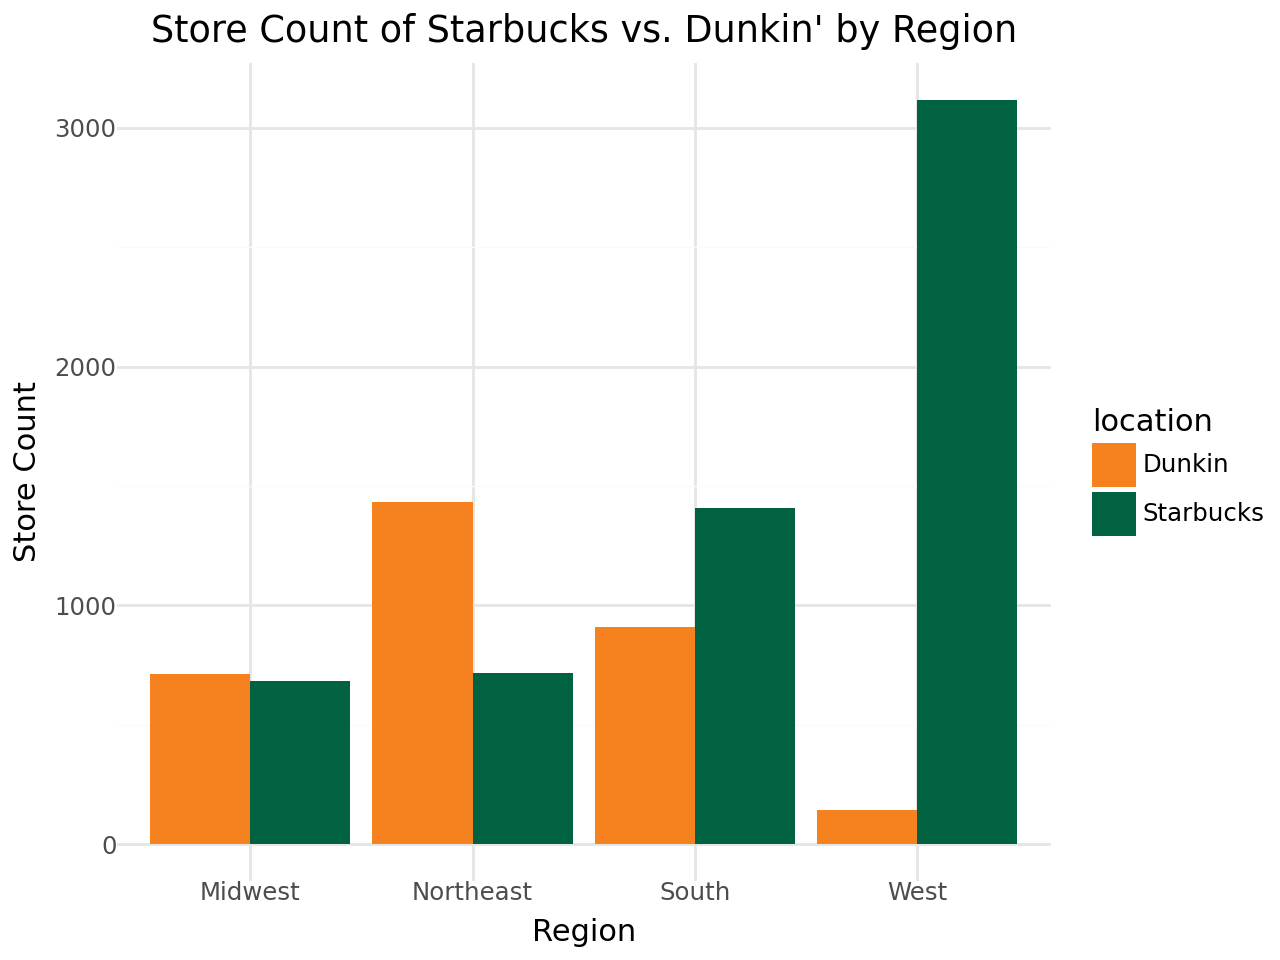

In [74]:
from plotnine import *
import pandas as pd

merged_data['store_count'] = merged_data['store_count'].astype(str).str.replace(',', '', regex=False).astype(int)

plot = (
    ggplot(merged_data, aes(x='Region', y='store_count', fill='location')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title="Store Count of Starbucks vs. Dunkin' by Region",
         x='Region', y='Store Count') +
    scale_fill_manual(values=['#f5821f', '#006241']) +
)

plot


The bar chart shows the number of Starbucks and Dunkin' Donuts stores by region. Dunkin' Donuts has a significantly higher number of stores in the Northeast compared to other regions, while Starbucks has a more balanced distribution across regions, with the highest number of stores in the West. This suggests that Dunkin' Donuts may have a stronger regional focus in the Northeast, while Starbucks has a more national presence.

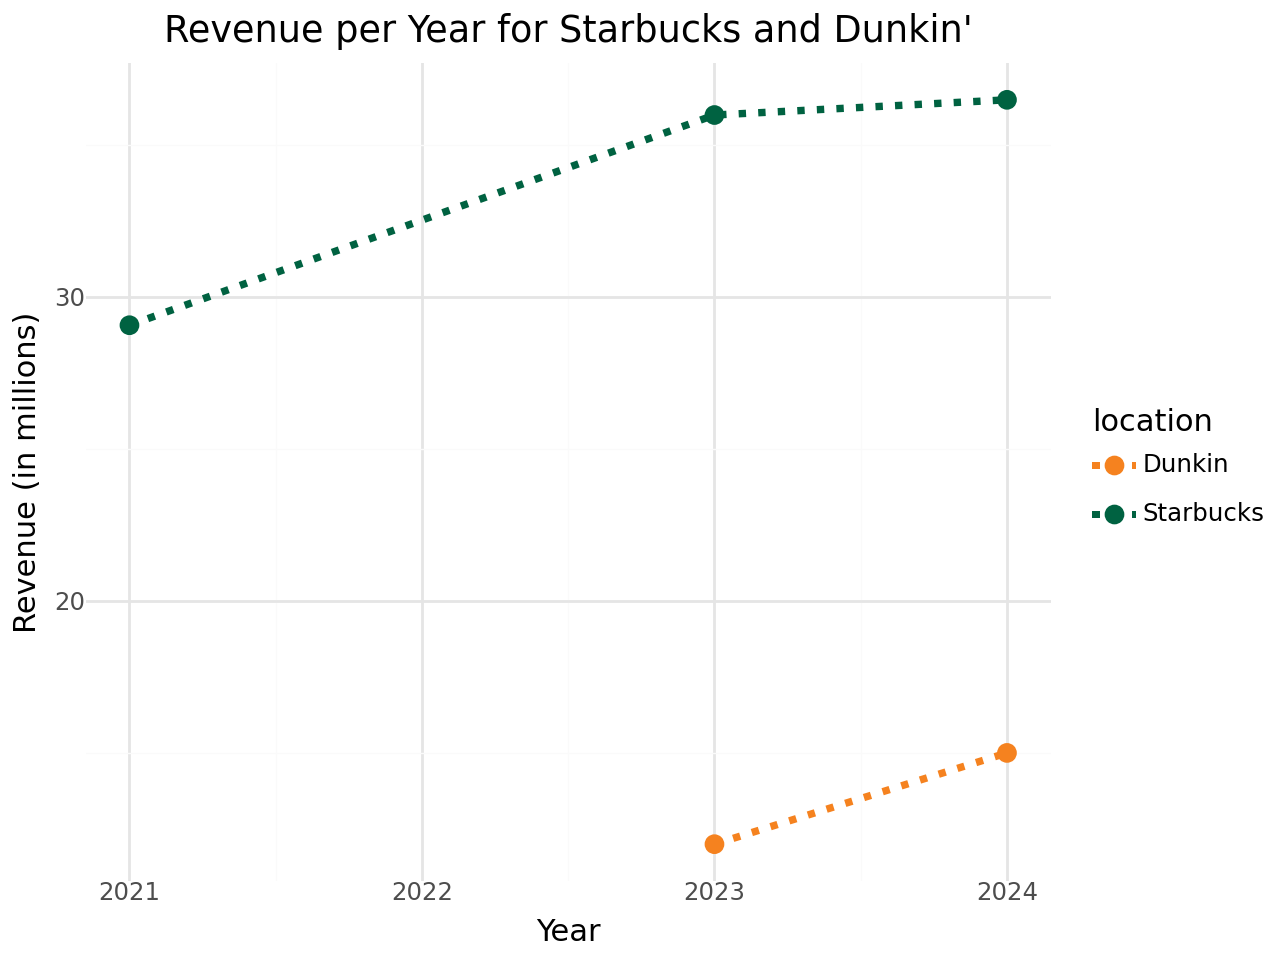

In [80]:
plot = (
    ggplot(revenue_merged, aes(x='year', y='Revenue (in billions)', color='location', group='location')) +
    geom_line(size=1.5, linetype='dotted') +
    geom_point(size=3) +
    labs(title="Revenue per Year for Starbucks and Dunkin'",
         x='Year', y='Revenue (in millions)') +
    scale_color_manual(values=['#f5821f', '#006241']) +
    theme_minimal()
)
plot

The line chart shows the revenue trend for Starbucks and Dunkin' Donuts from 2021 to 2024. Starbucks has consistently generated higher revenue than Dunkin' Donuts each year. Both chains experienced revenue growth, but Starbucks' growth has been more significant. This indicates that Starbucks has maintained a strong market position and has been able to attract more customers and generate higher sales compared to Dunkin' Donuts.

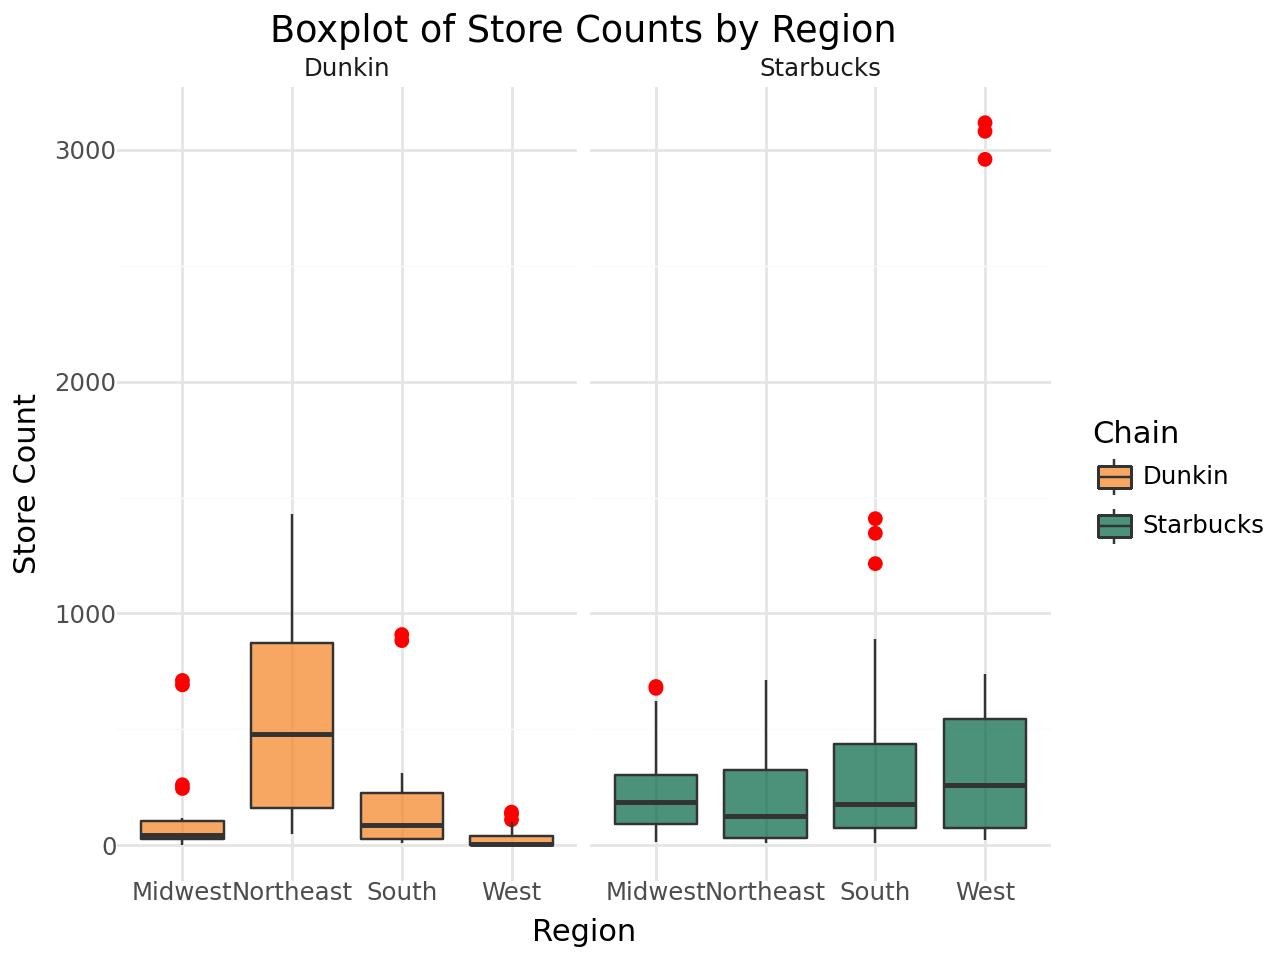

In [111]:
plot = (
    ggplot(merged_data, aes(x='Region', y='store_count', fill='location')) +
    geom_boxplot(alpha=0.7, outlier_color='red', outlier_size=2) +
    labs(title="Boxplot of Store Counts by Region",
         x='Region', y='Store Count') +
    scale_fill_manual(values=['#f5821f', '#006241'], name='Chain') +
    facet_wrap('~location') +
    theme_minimal()
)
plot

The box plot shows the distribution of store counts for Dunkin' Donuts and Starbucks across different regions. Dunkin' Donuts has a wider range of store counts in the Northeast, with some locations having significantly more stores than others. Starbucks, on the other hand, has a more consistent distribution of store counts across all regions. This suggests that Dunkin' Donuts may have a more varied presence in the Northeast, with some areas having a higher concentration of stores.

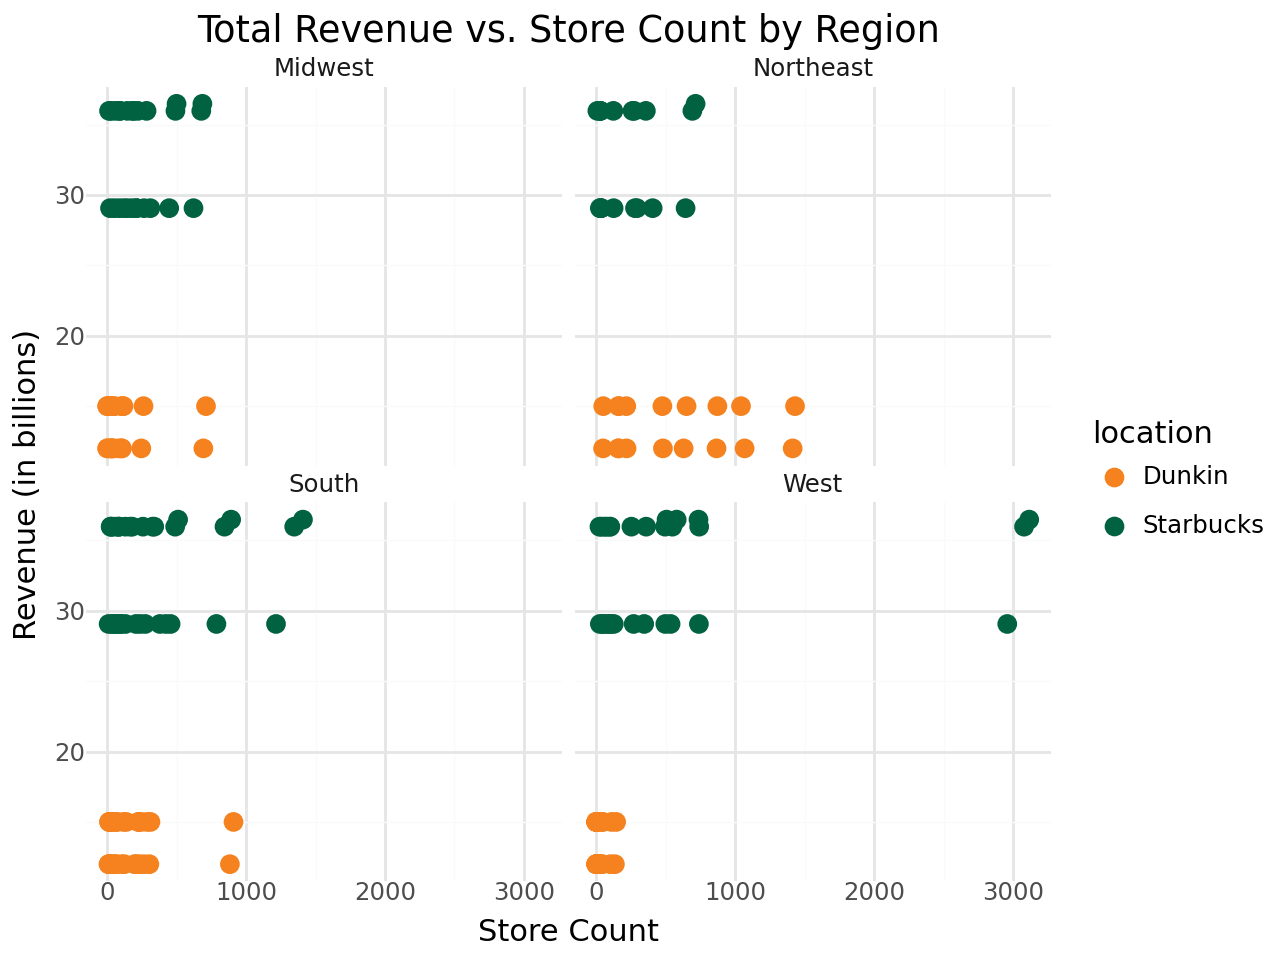

In [112]:

revenue_vs_store_count_plot = (
    ggplot(merged_data, aes(x='store_count', y='Revenue (in billions)', color='location')) +
    geom_point(size=3) +
    labs(title='Total Revenue vs. Store Count by Region',
         x='Store Count', y='Revenue (in billions)') +
    scale_color_manual(values=['#f5821f', '#006241']) +
    facet_wrap('~Region') +
    theme_minimal()
)
revenue_vs_store_count_plot


The scatter plot shows the relationship between total revenue and store count for Dunkin' Donuts and Starbucks across different regions. In general, both chains tend to generate higher revenue with more stores. However, there's variability within each region. For example, in the Northeast, some Dunkin' Donuts locations with fewer stores have higher revenue compared to those with more stores. This suggests that factors other than store count, such as location and consumer preferences, may influence revenue.

Automate

In [33]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_store_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    company = re.search(r'state-rankings/(.*?)-by-state', url)
    company_name = company.group(1).replace('-', ' ').title() if company else "Unknown Company"

    data_table = soup.find('table', class_='wpr-table')
    columns = [col.get_text(strip=True) for col in data_table.find_all('th')[3:]]
    headers, states, table_rows = [], [], []

    for header_cell in data_table.find_all('th', class_="datatable-th"):
        headers.append(header_cell.get_text(strip=True))
    header_count = len(data_table.find_all('th', class_="datatable-th"))

    for header_cell in data_table.find_all('th')[header_count:]:
        states.append(header_cell.get_text(strip=True))

    for i, row in enumerate(data_table.find_all('tr')[1:]):
        row_cells = row.find_all('td')
        row_data = {"State": states[i]}
        for j, cell in enumerate(row_cells):
            cell_content = cell.find("a") or cell
            row_data[headers[j + 1]] = cell_content.get_text(strip=True)
        table_rows.append(row_data)

    data = pd.DataFrame(table_rows)
    long_format_data = data.melt(id_vars="State", var_name="Year_Store", value_name="Count")

    long_format_data["Store"] = long_format_data["Year_Store"].apply(lambda x: x.split()[0])
    long_format_data["Year"] = long_format_data["Year_Store"].apply(lambda x: re.search(r'(\d{4})', x).group(0) if re.search(r'(\d{4})', x) else None)

    return long_format_data

In [34]:
# Test the function for mcdonalds
url = "https://worldpopulationreview.com/country-rankings/most-mcdonalds-by-country"
extract_store_data(url)

,State,Year_Store,Count,Store,Year
0,United States,# of McDonald's Locations 2024,"15,000",#,2024
1,Japan,# of McDonald's Locations 2024,"5,000",#,2024
2,China,# of McDonald's Locations 2024,"4,500",#,2024
3,France,# of McDonald's Locations 2024,"2,200",#,2024
4,Brazil,# of McDonald's Locations 2024,"1,800",#,2024
...,...,...,...,...,...
451,Monaco,Date of Final Closure,,Date,None
452,Russia,Date of Final Closure,"May 16, 2022",Date,None
453,Kazakhstan,Date of Final Closure,"January 5, 2023",Date,None
454,Belarus,Date of Final Closure,"November 27, 2022",Date,None


Chatgpt was used to make some of the complicated graphs and to automate the code for other websites.